In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import (Image)
import cv2

動画は(F, H, W, C)という４次元のテンソル担っており，ブロードキャストが必須である. 

# ブロードキャストの応用
## reshape

### ベクトルと行列のやり取り

In [2]:
x = np.arange(4).reshape(2, 2)
x

array([[0, 1],
       [2, 3]])

In [3]:
# １次元に戻すことも可能である.abs
x.reshape(4)

array([0, 1, 2, 3])

In [4]:
x.reshape(-1)

array([0, 1, 2, 3])

### テンソルと行列

In [5]:
# 2 x 1 x 3 の画像をつくり，RGB値を入力している. 
# PILは(W, H)の順番で解像度を指定していることに注意する
with Image.new("RGB", (1, 2), color = (255, 255, 0)) as img:
    x = np.array(img).reshape(2, 3)
    print(x)

[[255 255   0]
 [255 255   0]]


In [6]:
np.array(img).shape

(2, 1, 3)

In [7]:
with Image.new("RGB", (871, 1137), color = (255, 255, 0)) as img:
    x = np.array(img)
    print(x.shape)
    x = x.reshape(-1, 3)
    print(x.shape)

(1137, 871, 3)
(990327, 3)


In [8]:
1137 * 871

990327

画像を行列にするとなにが嬉しいのか，ということについて，まずカラーヒストグラムが挙げられる. 

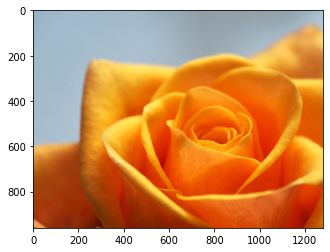

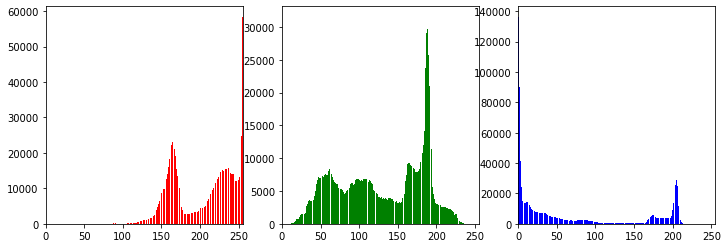

In [9]:
with Image.open("numpy_book/imgs/flower01.jpg") as img:
    plt.imshow(img)
    plt.show()
    x = np.array(img).reshape(-1, 3) # データの次元 x RGB

fig = plt.figure(figsize = (12, 4))
for i in range(3):
    ax = fig.add_subplot(1, 3, 1 + i)
    ax.hist(x[:,i], bins = 256, color = "rgb"[i])
    ax.set_xlim((0, 255))

plt.show()

## 軸を追加する関数

In [10]:
x = np.expand_dims(np.arange(5), axis = -1)
x.shape

(5, 1)

In [11]:
x = np.arange(5).reshape(5, 1)
x.shape

(5, 1)

In [12]:
x = np.expand_dims(np.arange(5), axis = 0)
x.shape

(1, 5)

In [13]:
x = np.arange(5).reshape(1, 5)
x.shape

(1, 5)

上述したように軸を追加する方法には，reshape，expand_dimsがある。

reshapeの方がやりやすいようにも見えるが，ディープラーニングのような複雑なモデルを扱うときには，expand_dimsを使う. また，stackでも大丈夫である. 

expand_dimsは指定した軸に新しいshapeが加わる.


## ブロードキャスト




### reshapeの計算コスト

reshapeの計算コストは軽いので暗黙のブロードキャストが行われないように，
shapeを合わせておくことが望ましい。



In [14]:
%timeit -n 100000 np.arange(100)
%timeit -n 100000 np.arange(100).reshape(1, 100)
%timeit -n 100000 np.expand_dims(np.arange(100), axis = 0)

551 ns ± 22.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
780 ns ± 8.39 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.82 µs ± 47.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### アンチパターン

In [15]:
# どの軸で計算が行われているのかがわからない ？
x = np.zeros((3, 3, 3)) + np.array([1, 2, 3])
x

array([[[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]],

       [[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]])

In [16]:
x = np.zeros((3, 3, 3)) + np.array([1, 2, 3]).reshape(1, 3, 1)
x

array([[[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]],

       [[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]],

       [[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]]])

## ブロードキャストを自在に操る

### 九九



In [17]:
a = np.arange(9).reshape(1, 9) + 1
b = np.arange(9).reshape(9, 1) + 1
a * b

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

### 縦横のグラデーション

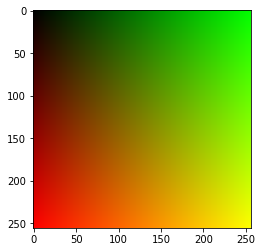

In [18]:
img = np.zeros((256, 256, 3), dtype = np.uint8)
img[..., 0] = np.arange(256).reshape(-1, 1) # 縦のグラデーション
img[..., 1] = np.arange(256).reshape(1, -1) # 横のグラデーション
plt.imshow(img)

### 動画でのブロードキャスト

In [19]:
frames = np.zeros((100, 256, 256, 3), dtype = np.uint8)
# フレーム方向にグラデーションを追加している
frames[..., 0] = \
    np.linspace(255, 0, frames.shape[0], dtype = np.uint8).reshape(-1, 1, 1)
frames[..., ２] = \
    np.linspace(0, 255, frames.shape[0], dtype = np.uint8).reshape(-1, 1, 1)

fig = plt.figure(figsize = (8, 8))
for i, f in enumerate([0, 30, 60, 99]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(frames[f])
    ax.set_title("f =" + str(f))
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-19-5cab0d0a9f5e>, line 5)

###

## 軸を増やすための書き方

In [42]:
print("- reshape -")
%timeit -n 1000000 np.arange(100).reshape(1, 100)
%timeit -n 1000000 np.arange(100).reshape(100, 1)
print("- expand_dims -")
%timeit -n 1000000 np.expand_dims(np.arange(100),axis=0)
%timeit -n 1000000 np.expand_dims(np.arange(100),axis=-1)
print("- np.newaxis -")
%timeit -n 1000000 np.arange(100)[np.newaxis, :]
%timeit -n 1000000 np.arange(100)[:, np.newaxis]
print("- None -")
%timeit -n 1000000 np.arange(100)[None, :]
%timeit -n 1000000 np.arange(100)[:, None]

- reshape -
811 ns ± 2.34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
815 ns ± 1.65 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
- expand_dims -
3.86 µs ± 49.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.89 µs ± 54.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
- np.newaxis -
874 ns ± 20.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
864 ns ± 13.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
- None -
824 ns ± 1.54 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
837 ns ± 22.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


上記を見ると，基本的にexpand_dimsはやや遅いが，繰り返し使うものでなければ，どれを使っても大差がないように思える. 

## 手動ブロードキャスト

なにも考えずとりあずブロードキャストしてみる. 

### np.broadcast_to

In [44]:
x = np.arange(3).reshape(3, 1)
x = np.broadcast_to(x, (3, 2))
x # axis = 1の方向にコピーさせている

array([[0, 0],
       [1, 1],
       [2, 2]])

ブロードキャストした配列に対して，x[0,:]のような代入するとエラーになる。

つまりは，計算はできるが，代入はできない. 

In [46]:
x[:1] = 1


ValueError: assignment destination is read-only

In [47]:
x * 2

array([[0, 0],
       [2, 2],
       [4, 4]])

では，どうするかというと，copy, np.repeatヲ使う. 

In [51]:
xc = x.copy()
xc[0] = 10
xc

array([[10, 10],
       [ 1,  1],
       [ 2,  2]])

In [53]:
x = np.arange(3).reshape(1, 3)
x = np.repeat(x, 2, axis = 0)
x

array([[0, 1, 2],
       [0, 1, 2]])

数値計算らしい方法としては，１を乗じるものもある. 

In [55]:
x = np.arange(3).reshape(1, 3)
x = x * np.ones((2, 1), dtype = x.dtype)
x[0, :] = 1
x

array([[1, 1, 1],
       [0, 1, 2]])

速度的にはnp.repeatが早いのでこれを使うこと. 

## reshapeの黒魔術(1) ：モノクロ画像の切り出し


これはすごい！！！！！！


In [63]:
x = np.arange(36).reshape(6, 6)
print("元の行列\n", x)

元の行列
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]


In [62]:
# 2 x 2 の小さい画像にreshaep
x = x.reshape(3, 2, 3, 2)
x = x.transpose([0, 2, 1, 3])
x = x.reshape(-1, 2, 2)

print("切り出した行列")
for i in range(x.shape[0]):
    print(x[i])

切り出した行列
[[0 1]
 [6 7]]
[[2 3]
 [8 9]]
[[ 4  5]
 [10 11]]
[[12 13]
 [18 19]]
[[14 15]
 [20 21]]
[[16 17]
 [22 23]]
[[24 25]
 [30 31]]
[[26 27]
 [32 33]]
[[28 29]
 [34 35]]


やっていることは次の図を見れば明らか.

![](./dat/reshape_trick.jpg)

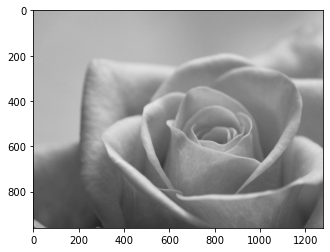

In [83]:
with Image.open("numpy_book/imgs/flower01.jpg") as img:
    x = np.array(img.convert("L"))
    H, W = x.shape
plt.imshow(x, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

In [84]:
batch_y, batch_x = 320, 320
x = x.reshape(H // batch_y, batch_y, W // batch_x, batch_x)
x = x.transpose(0, 2, 1, 3)
x = x.reshape(-1, batch_y, batch_x)
x.shape

(12, 320, 320)

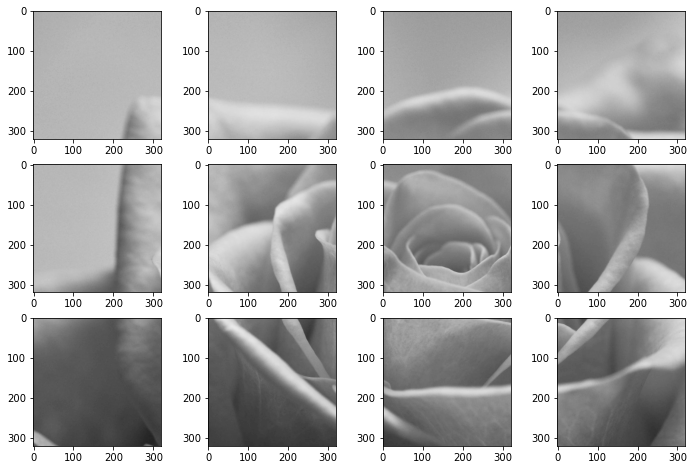

In [85]:
fig = plt.figure(figsize = (12, 8))
for i in range(x.shape[0]):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(x[i], cmap = "gray", vmin = 0, vmax = 255)

plt.show()

## reshapeの黒魔術：カラー画像の切り出し

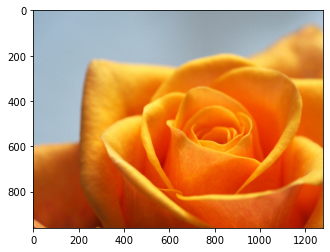

In [88]:
with Image.open("numpy_book/imgs/flower01.jpg") as img:
    x = np.array(img)
    H, W, C = x.shape
    plt.imshow(x)
plt.show()

In [89]:
batch_y, batch_x = 320, 320
x = x.reshape(H // batch_y, batch_y, W // batch_x, batch_x, 3)
x = x.transpose(0, 2, 1, 3, 4)
x = x.reshape(-1, batch_y, batch_x, 3)
x.shape

(12, 320, 320, 3)

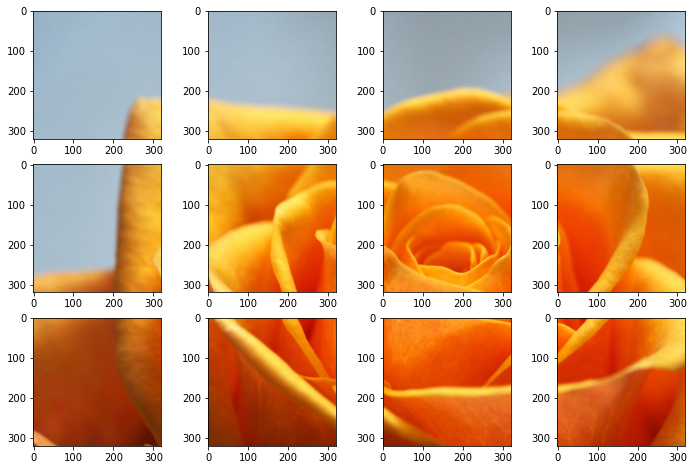

In [90]:
fig = plt.figure(figsize = (12, 8))
for i in range(x.shape[0]):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(x[i])

plt.show()

## reshapeの黒魔術カラー画像の切り出し

In [91]:
with Image.open("numpy_book/imgs/flower01.jpg") as img:
    x = np.array(img)
    H, W, c = x.shape

batch_y, batch_x = 240, 320
x = x.reshape(H // batch_y, batch_y, W // batch_x, batch_x, 3)
x = x.transpose(0, 2, 1, 3, 4)
x = x.reshape(-1, batch_y, batch_x, 3)
x.shape

(16, 240, 320, 3)

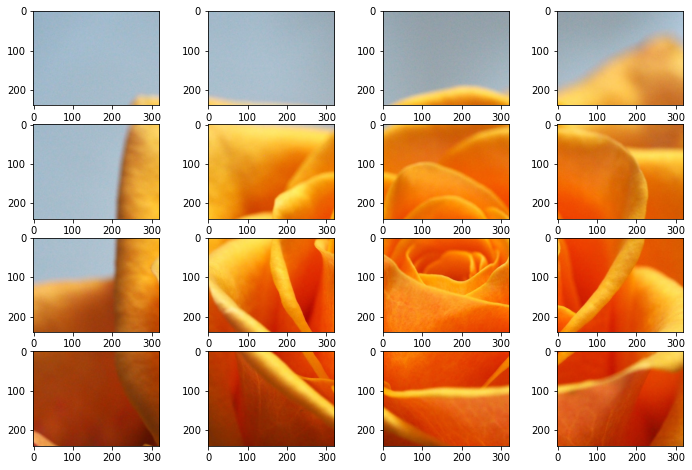

In [93]:
fig = plt.figure(figsize = (12, 8))
for i in range(x.shape[0]):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.imshow(x[i])

plt.show()

## Colabで動画を表示する方法

In [35]:
from numpy_book import video_utils

frames = np.zeros((256, 128, 128, 3), dtype = np.uint8)
# Bにだけグラデーションを与える
# framが変わるごとに青になっていく
frames[..., 2] = np.arange(256)[:, None, None]
video_utils.save_video("./dat/blue_grad.mp4", frames, frame_rate = 24.)


In [23]:
# jupyterでの動画の表示
import moviepy.editor
moviepy.editor.VideoFileClip("./dat/blue_grad.mp4").ipython_display()

t:   0%|          | 0/257 [00:00<?, ?it/s, now=None]Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4

Moviepy - Done !
Moviepy - video ready __temp__.mp4


## 演習問題

### Q3:九九

In [20]:
np.arange(1, 10).reshape(9, -1) * np.arange(1, 10).reshape(-1, 9)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

### Q4：真理値表

論理関数もブロードキャストが適用されるようです.

In [21]:
x = np.array([True, False]).reshape(2, 1)

np.logical_and(x, x.T)

array([[ True, False],
       [False, False]])

In [22]:
np.logical_or(x, x.T)

array([[ True,  True],
       [ True, False]])

In [23]:
np.logical_xor(x, x.T)

array([[False,  True],
       [ True, False]])

### Q5：駅間距離


In [24]:
dist_from_depature = np.array([0, 1.1, 2.8, 4.7, 7])
np.abs(dist_from_depature[None, :] - dist_from_depature[:, None])

array([[0. , 1.1, 2.8, 4.7, 7. ],
       [1.1, 0. , 1.7, 3.6, 5.9],
       [2.8, 1.7, 0. , 1.9, 4.2],
       [4.7, 3.6, 1.9, 0. , 2.3],
       [7. , 5.9, 4.2, 2.3, 0. ]])

### Q6：都市間の直線距離

In [31]:
lonlat = np.array([
    [43.06, 141.35], 
    [43.77, 142.37], 
    [45.40, 141.68], 
    [42.97, 144.38], 
    [43.33, 145.58], 
    [42.91, 143.18],
    [42.34, 140.99], 
    [41.79, 140.74]
])

# 都市x都市x(lon, lat)
dmat = \
np.sqrt(
    np.sum(
        ((lonlat[None, :, :] - lonlat[:, None, :]) * np.array([111, 82])[None, None, :]) ** 2, 
        axis = 2
    )
)


np.round(dmat, 0)

array([[  0., 115., 261., 249., 348., 151.,  85., 150.],
       [115.,   0., 190., 187., 268., 116., 195., 257.],
       [261., 190.,   0., 349., 394., 303., 344., 408.],
       [249., 187., 349.,   0., 106.,  99., 287., 326.],
       [348., 268., 394., 106.,   0., 202., 392., 432.],
       [151., 116., 303.,  99., 202.,   0., 190., 236.],
       [ 85., 195., 344., 287., 392., 190.,   0.,  64.],
       [150., 257., 408., 326., 432., 236.,  64.,   0.]])

### Q7：グラデーション

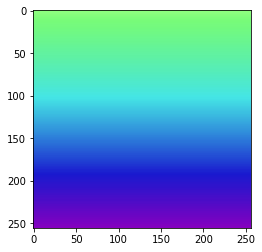

In [36]:
img = np.full((256, 256, 3), 255, dtype = np.uint8)
img[..., 0] = np.linspace(80, 200, 256)[:, None].astype(np.uint8)
img[..., 1] = np.linspace(128, 255, 256)[:, None].astype(np.uint8)
img[..., 2] = np.linspace(255, 192, 256)[:, None].astype(np.uint8)

with Image.fromarray(img, "HSV") as img:
    plt.imshow(img.convert("RGB"))



### Q8：はじめまして動画

In [38]:
frame = np.zeros((3, 255, 255, 3), dtype = np.uint8)
frame[0, ...] = np.array([128, 255, 255], dtype = np.uint8)[None, None, None, :]
frame[1, ...] = np.array([255, 128, 255], dtype = np.uint8)[None, None, None, :]
frame[2, ...] = np.array([255, 255, 128], dtype = np.uint8)[None, None, None, :]


video_utils.save_video("./dat/q08.mp4", frame, frame_rate = 1)

### Q9：グラデーション動画

In [41]:
frames = np.zeros((100, 256, 256, 3), dtype = np.uint8)
frames[..., 0] = np.linspace(0, 255, 100, dtype = np.uint8)[:, None, None]
frames[..., 1] = np.linspace(255, 0, 100, dtype = np.uint8)[:, None, None]
frames[..., 2] = np.linspace(128, 255, 100, dtype = np.uint8)[:, None, None]

video_utils.save_video("./dat/q09.mp4", frames, frame_rate = 1)